In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/2-Shot-ADAPT-VQE/')
print(sys.executable)

/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


In [2]:
import openfermion
print(openfermion.__version__)

1.6.1


## H2

In [10]:
from src.pools import QE
from src.molecules import create_h2, create_h3

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 0.742
molecule = create_h2(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=3,
                    max_opt_iter=100,
                    grad_threshold=10**-5,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()

self.fermionic_hamiltonian: () 0.7131768341239892
((0, 1), (0, 0)) -1.2521011771187973
((1, 1), (1, 0)) -1.2521011771187973
((2, 1), (2, 0)) -0.4763246662830587
((3, 1), (3, 0)) -0.4763246662830587
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3371871363510416
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09066120278229658
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3371871363510416
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09066120278229658
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09066120278229658
((0, 1), (2, 1), (2, 0), (0, 0)) 0.33168193748206215
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09066120278229658
((0, 1), (3, 1), (3, 0), (0, 0)) 0.33168193748206215
((1, 1), (0, 1), (0, 0), (1, 0)) 0.3371871363510416
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09066120278229658
((1, 1), (1, 1), (1, 0), (1, 0)) 0.3371871363510416
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09066120278229658
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09066120278229658
((1, 1), (2, 1), (2, 0), (1, 0)) 0.33168193748206215
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09066120278229658
((1, 1), (3

[array(-1.11665125), -1.1372633383635304]


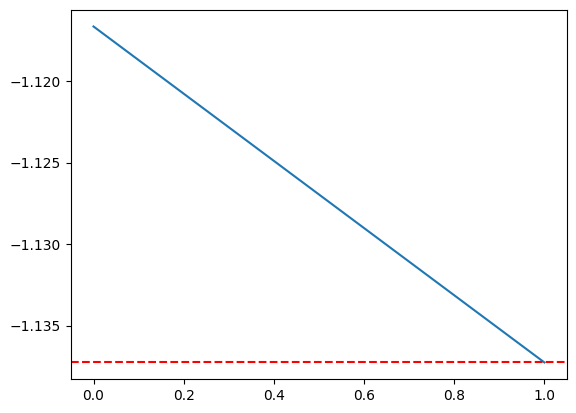

In [11]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

## H3

In [5]:
from src.pools import QE
from src.molecules import create_h2, create_h3

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 0.742
molecule = create_h3(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=10,
                    max_opt_iter=100,
                    grad_threshold=10**-3,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()

self.fermionic_hamiltonian: () 1.7829420853099731
((0, 1), (0, 0)) -1.795743929471608
((0, 1), (4, 0)) -0.14981297221498505
((1, 1), (1, 0)) -1.795743929471608
((1, 1), (5, 0)) -0.14981297221498505
((2, 1), (2, 0)) -1.2599121840674699
((3, 1), (3, 0)) -1.2599121840674699
((4, 1), (0, 0)) -0.14981297221498555
((4, 1), (4, 0)) -0.5289277553528107
((5, 1), (1, 0)) -0.14981297221498555
((5, 1), (5, 0)) -0.5289277553528107
((0, 1), (0, 1), (0, 0), (0, 0)) 0.31065632396171394
((0, 1), (0, 1), (0, 0), (4, 0)) 0.0493490106556841
((0, 1), (0, 1), (2, 0), (2, 0)) 0.07706965552246642
((0, 1), (0, 1), (4, 0), (0, 0)) 0.04934901065568413
((0, 1), (0, 1), (4, 0), (4, 0)) 0.0643118165027301
((0, 1), (1, 1), (1, 0), (0, 0)) 0.31065632396171394
((0, 1), (1, 1), (1, 0), (4, 0)) 0.0493490106556841
((0, 1), (1, 1), (3, 0), (2, 0)) 0.07706965552246642
((0, 1), (1, 1), (5, 0), (0, 0)) 0.04934901065568413
((0, 1), (1, 1), (5, 0), (4, 0)) 0.0643118165027301
((0, 1), (2, 1), (0, 0), (2, 0)) 0.07706965552246642

[array(-1.50189761), -1.5149418065839753, -1.5222752739094567, -1.52484955084296, -1.5272758204764387]


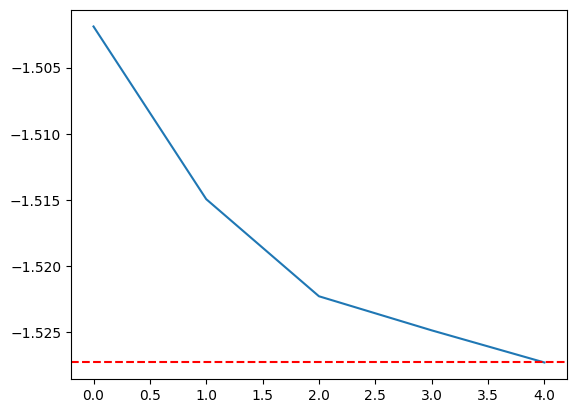

In [6]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

## H3

In [12]:
from src.pools import QE
from src.molecules import create_h2, create_h3

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 0.742
molecule = create_h3(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=20,
                    max_opt_iter=100,
                    grad_threshold=10**-1,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()

self.fermionic_hamiltonian: () 1.7829420853099731
((0, 1), (0, 0)) -1.795743929471609
((0, 1), (4, 0)) -0.14981297221498538
((1, 1), (1, 0)) -1.795743929471609
((1, 1), (5, 0)) -0.14981297221498538
((2, 1), (2, 0)) -1.2599121840674703
((3, 1), (3, 0)) -1.2599121840674703
((4, 1), (0, 0)) -0.1498129722149858
((4, 1), (4, 0)) -0.5289277553528106
((5, 1), (1, 0)) -0.1498129722149858
((5, 1), (5, 0)) -0.5289277553528106
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3106563239617143
((0, 1), (0, 1), (0, 0), (4, 0)) 0.04934901065568417
((0, 1), (0, 1), (2, 0), (2, 0)) 0.0770696555224665
((0, 1), (0, 1), (4, 0), (0, 0)) 0.049349010655684124
((0, 1), (0, 1), (4, 0), (4, 0)) 0.0643118165027301
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3106563239617143
((0, 1), (1, 1), (1, 0), (4, 0)) 0.04934901065568417
((0, 1), (1, 1), (3, 0), (2, 0)) 0.0770696555224665
((0, 1), (1, 1), (5, 0), (0, 0)) 0.049349010655684124
((0, 1), (1, 1), (5, 0), (4, 0)) 0.0643118165027301
((0, 1), (2, 1), (0, 0), (2, 0)) 0.0770696555224665
((

[array(-1.50189761), -1.5149418065838316, -1.5222752739094645, -1.5248495508429634, -1.5272758204764294]


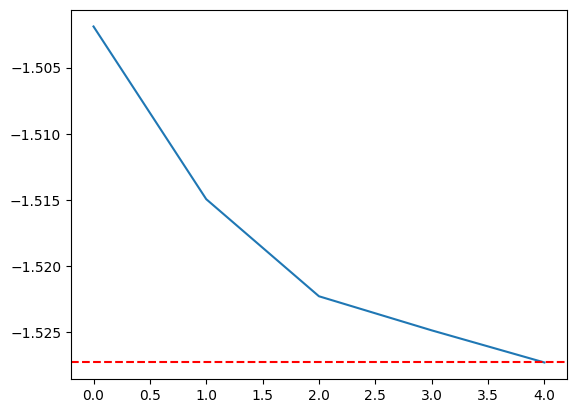

In [13]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

## LiH

In [17]:
from src.pools import QE
from src.molecules import create_h2, create_h3, create_lih

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 1.542
molecule = create_lih(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=20,
                    max_opt_iter=100,
                    grad_threshold=0.01,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()

self.fermionic_hamiltonian: () 1.0295276477042803
((0, 1), (0, 0)) -4.739723584917281
((0, 1), (2, 0)) 0.10776304299279552
((0, 1), (4, 0)) 0.16765004018238225
((0, 1), (10, 0)) -0.02976939241889005
((1, 1), (1, 0)) -4.739723584917281
((1, 1), (3, 0)) 0.10776304299279552
((1, 1), (5, 0)) 0.16765004018238225
((1, 1), (11, 0)) -0.02976939241889005
((2, 1), (0, 0)) 0.10776304299279549
((2, 1), (2, 0)) -1.5153100250929523
((2, 1), (4, 0)) 0.0344933286091447
((2, 1), (10, 0)) -0.06968550403352418
((3, 1), (1, 0)) 0.10776304299279549
((3, 1), (3, 0)) -1.5153100250929523
((3, 1), (5, 0)) 0.0344933286091447
((3, 1), (11, 0)) -0.06968550403352418
((4, 1), (0, 0)) 0.16765004018238236
((4, 1), (2, 0)) 0.03449332860914466
((4, 1), (4, 0)) -1.1295407117332399
((4, 1), (10, 0)) 0.031532517000879626
((5, 1), (1, 0)) 0.16765004018238236
((5, 1), (3, 0)) 0.03449332860914466
((5, 1), (5, 0)) -1.1295407117332399
((5, 1), (11, 0)) 0.031532517000879626
((6, 1), (6, 0)) -1.1412874997907283
((7, 1), (7, 0)) 

[array(-7.86318622), -7.87713155642006, -7.878919026640787, -7.880578544104983, -7.880665646747383, -7.881250266062017, -7.881807547931549]


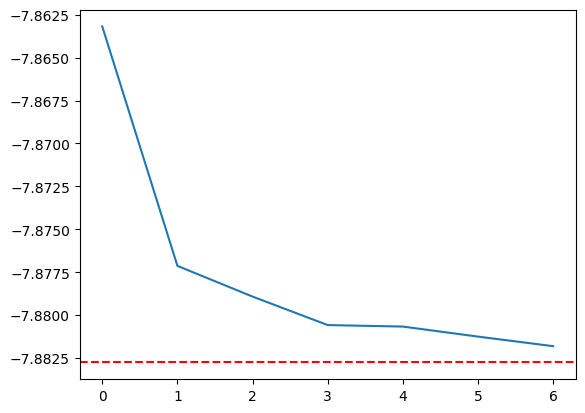

In [18]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

### LiH Convergence Criterion: Max_G_Norm

In [ ]:
from src.pools import QE
from src.molecules import create_h2, create_h3, create_lih

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 1.54
molecule = create_lih(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=20,
                    max_opt_iter=100,
                    grad_threshold=0.01,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()


. . . ======= Start Run ADAPT-VQE ======= . . .

 # Initialize Data 
	> Qiskit Estimator Energy Evaluation
	energy_qiskit_estimator: -7.8632102123208725
	Initial Energy =  -7.8632102123208725
	Exact Energt = -7.882752644198726

. . . ======= ADAPT-VQE Iteration 1 ======= . . .

 # Active Circuit at Adapt iteration 1:

 # Rank Gradients (Pool size = 570)

	Evaluating Gradient 0
		value = 0.0

	Evaluating Gradient 1
		value = 5.338415300093491e-11

	Evaluating Gradient 2
		value = 0.0

	Evaluating Gradient 3
		value = 0.0

	Evaluating Gradient 4
		value = -2.3267392786768815e-11

	Evaluating Gradient 5
		value = 0.0

	Evaluating Gradient 6
		value = -5.3384150832530564e-11

	Evaluating Gradient 7
		value = 0.0

	Evaluating Gradient 8
		value = 0.0

	Evaluating Gradient 9
		value = 2.3267414037131395e-11

	Evaluating Gradient 10
		value = 1.4162332513320552e-08
		total norm = 2.0057166221785645e-16 ✅

	Evaluating Gradient 11
		value = 0.0

	Evaluating Gradient 12
		value = 0.0

	Evaluati

### LiH Time Benchmark

In [11]:
from src.pools import QE
from src.molecules import create_h2, create_h3, create_lih

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 1.542
molecule = create_lih(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=20,
                    max_opt_iter=100,
                    grad_threshold=0.01,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()


. . . ======= Start Run ADAPT-VQE ======= . . .

 # Initialize Data 
	> Qiskit Estimator Energy Evaluation
	energy_qiskit_estimator: -7.863186218390268
	Initial Energy =  -7.863186218390268
	Exact Energt = -7.882757079132621

. . . ======= ADAPT-VQE Iteration 1 ======= . . .

 # Active Circuit at Adapt iteration 1:

 # Rank Gradients (Pool size = 570)

	Evaluating Gradient 0
		Estimator Time = 0.0026166439056396484
		value = 0.0

	Evaluating Gradient 1
		Estimator Time = 0.0018575191497802734
		value = 5.884567551121822e-11

	Evaluating Gradient 2
		Estimator Time = 0.0017483234405517578
		value = 0.0

	Evaluating Gradient 3
		Estimator Time = 0.001791238784790039
		value = 0.0

	Evaluating Gradient 4
		Estimator Time = 0.0019731521606445312
		value = -2.2041922649075618e-11

	Evaluating Gradient 5
		Estimator Time = 0.0017931461334228516
		value = 0.0

	Evaluating Gradient 6
		Estimator Time = 0.0020377635955810547
		value = -5.88456974121021e-11

	Evaluating Gradient 7
		Estimator T

[-7.863186218390268, -7.877131556420839, -7.8789190266408085, -7.880578544104086, -7.88066564674511, -7.881250266067115, -7.881807547922662]


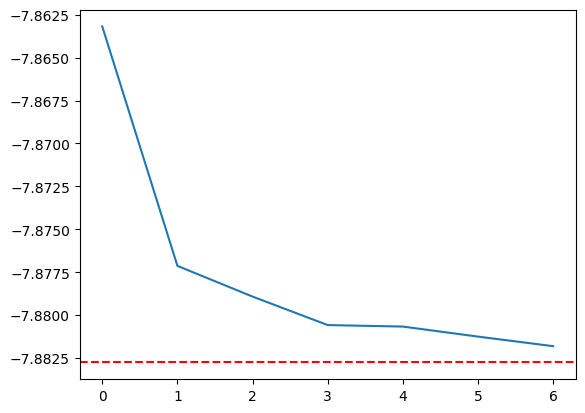

In [12]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')